In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Employee_Attrition_DataSet.csv")

In [3]:
print("shape of table:",df.shape)

shape of table: (10000, 14)


In [4]:
df.head()

,EmployeeID,Age,Department,JobLevel,YearsAtCompany,MonthlyIncome,JobSatisfaction,WorkLifeBalance,OverTime,DistanceFromHome,PromotionLast5Years,PerformanceRating,TrainingHoursLastYear,Attrition
0,EMP0000,42,Sales,3,9,9866,4,1,No,24.5,Yes,4,19,No
1,EMP0001,36,Sales,3,7,8958,3,3,No,10.0,No,2,13,No
2,EMP0002,44,Sales,4,16,11716,4,3,No,4.0,No,4,13,No
3,EMP0003,53,Finance,4,30,17061,5,3,No,7.1,No,3,20,No
4,EMP0004,35,HR,2,4,5738,2,3,No,8.4,No,2,15,No


In [5]:
df.columns

Index(['EmployeeID', 'Age', 'Department', 'JobLevel', 'YearsAtCompany',
       'MonthlyIncome', 'JobSatisfaction', 'WorkLifeBalance', 'OverTime',
       'DistanceFromHome', 'PromotionLast5Years', 'PerformanceRating',
       'TrainingHoursLastYear', 'Attrition'],
      dtype='object')

In [6]:
df.isnull().sum()        # there is zero null values

EmployeeID               0
Age                      0
Department               0
JobLevel                 0
YearsAtCompany           0
MonthlyIncome            0
JobSatisfaction          0
WorkLifeBalance          0
OverTime                 0
DistanceFromHome         0
PromotionLast5Years      0
PerformanceRating        0
TrainingHoursLastYear    0
Attrition                0
dtype: int64

In [10]:
df.columns

Index(['EmployeeID', 'Age', 'Department', 'JobLevel', 'YearsAtCompany',
       'MonthlyIncome', 'JobSatisfaction', 'WorkLifeBalance', 'OverTime',
       'DistanceFromHome', 'PromotionLast5Years', 'PerformanceRating',
       'TrainingHoursLastYear', 'Attrition'],
      dtype='object')

In [7]:
# selct only  numeric columns

numeric_columns = df.select_dtypes(include='number')
numeric_columns


,Age,JobLevel,YearsAtCompany,MonthlyIncome,JobSatisfaction,WorkLifeBalance,DistanceFromHome,PerformanceRating,TrainingHoursLastYear
0,42,3,9,9866,4,1,24.5,4,19
1,36,3,7,8958,3,3,10.0,2,13
2,44,4,16,11716,4,3,4.0,4,13
3,53,4,30,17061,5,3,7.1,3,20
4,35,2,4,5738,2,3,8.4,2,15
...,...,...,...,...,...,...,...,...,...
9995,51,4,28,14510,4,1,14.0,3,17
9996,22,1,0,5659,3,3,25.3,3,19
9997,30,1,0,4223,3,4,15.8,2,20
9998,42,2,2,7990,5,3,5.7,3,25


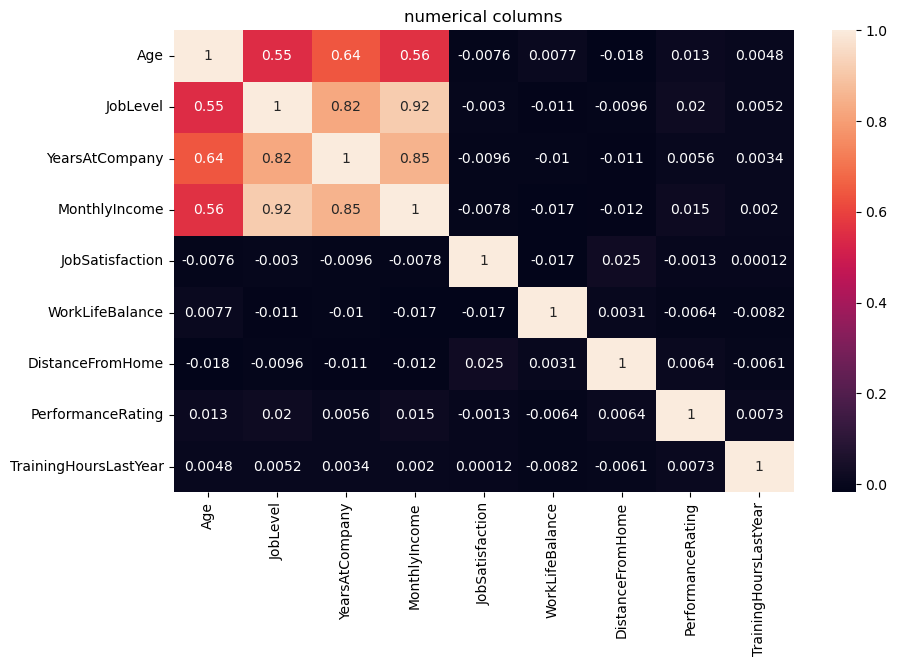

In [8]:
corr = numeric_columns.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)
plt.title("numerical columns")
plt.show()

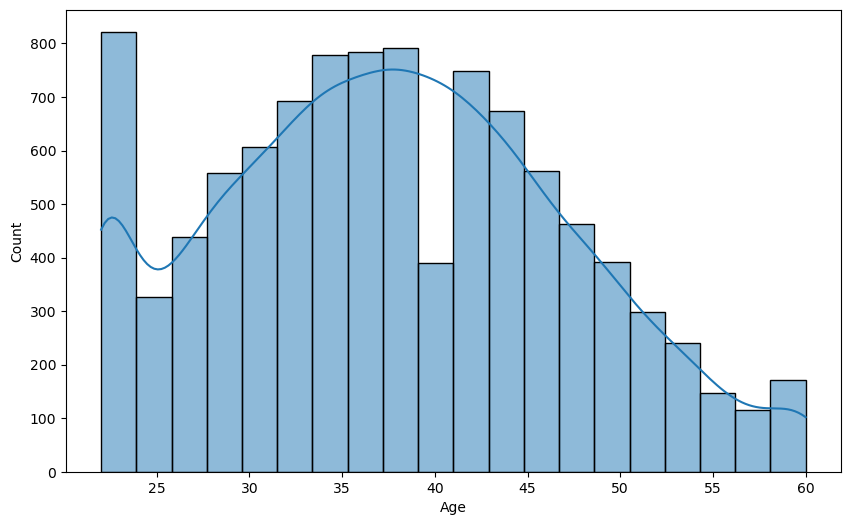

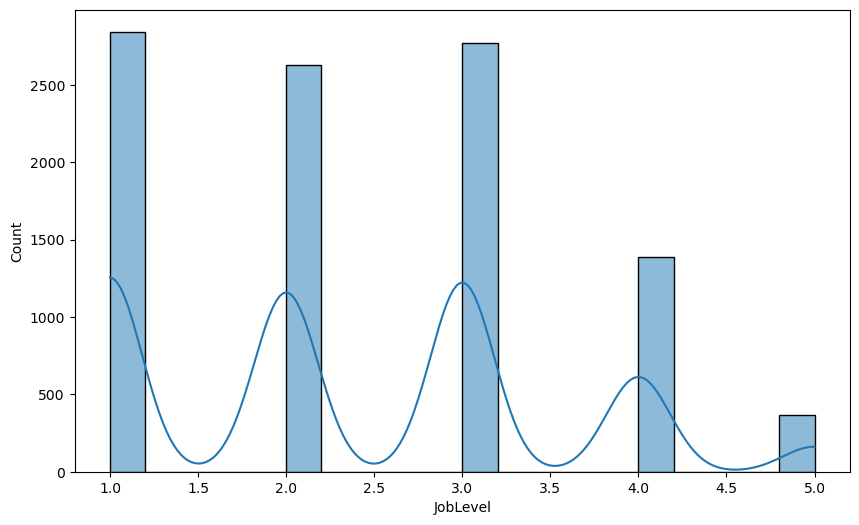

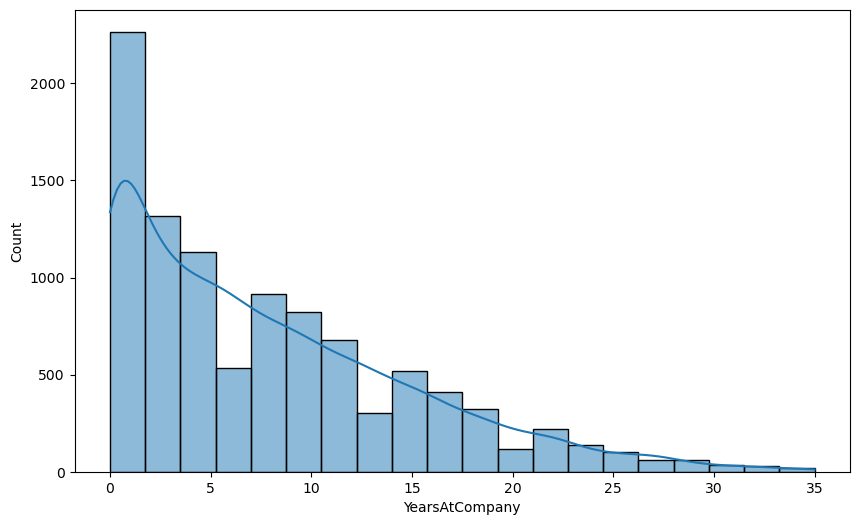

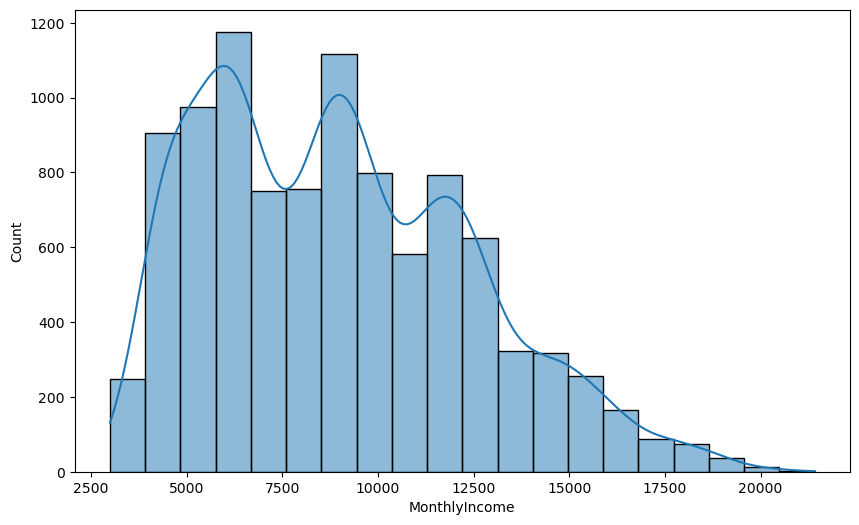

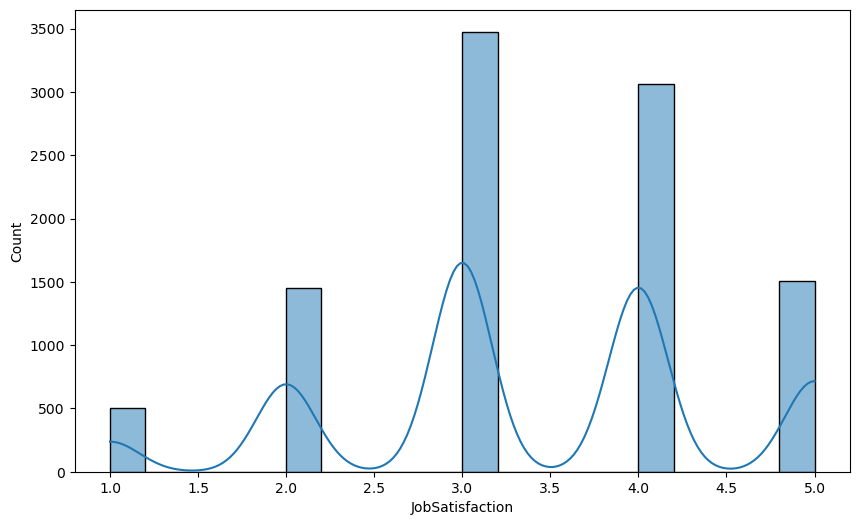

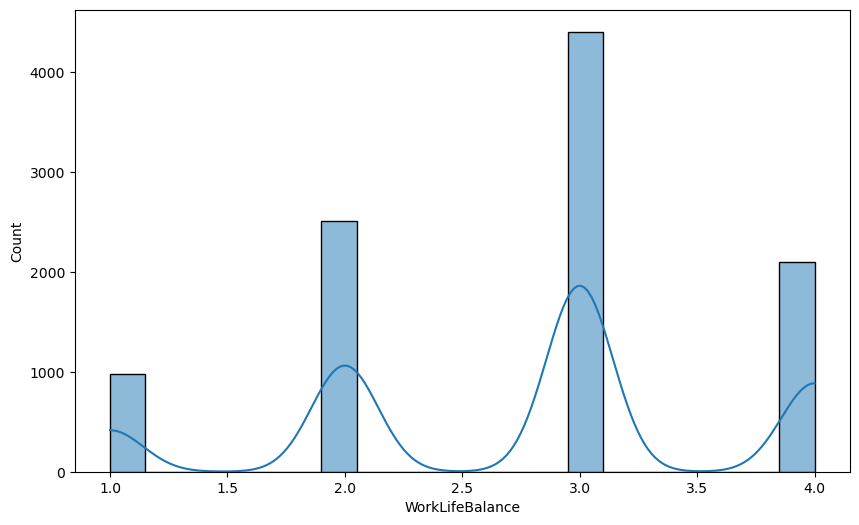

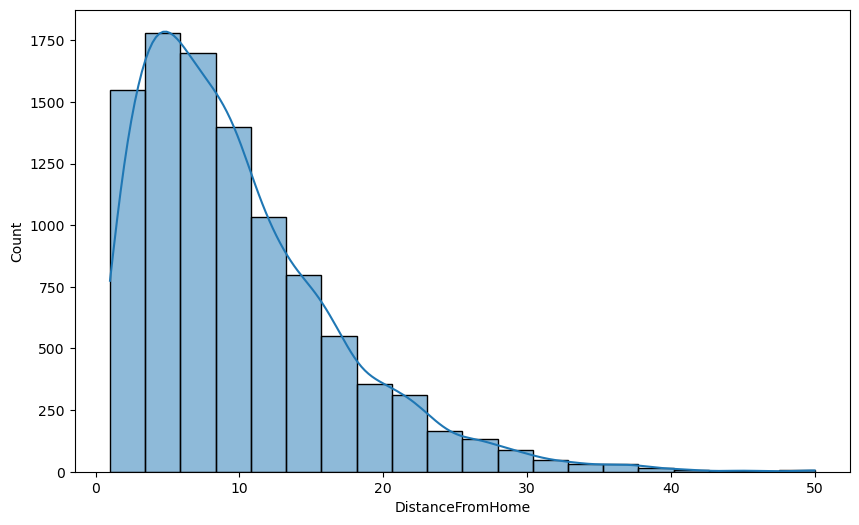

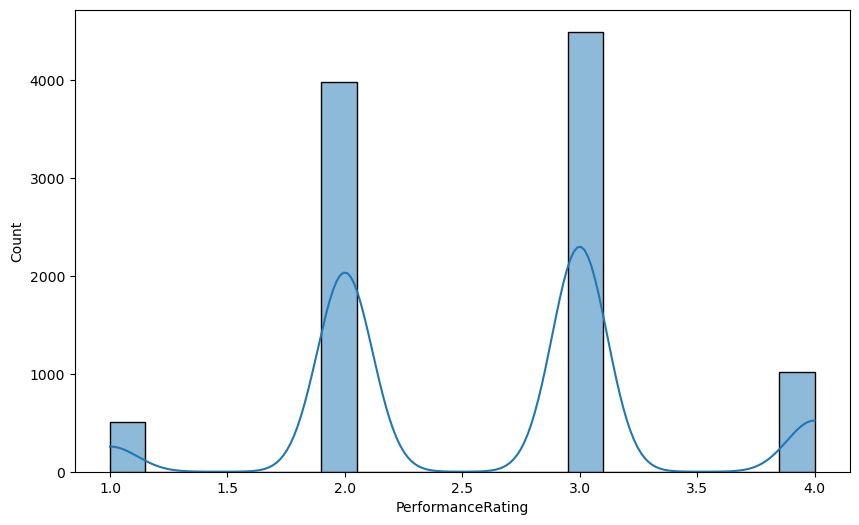

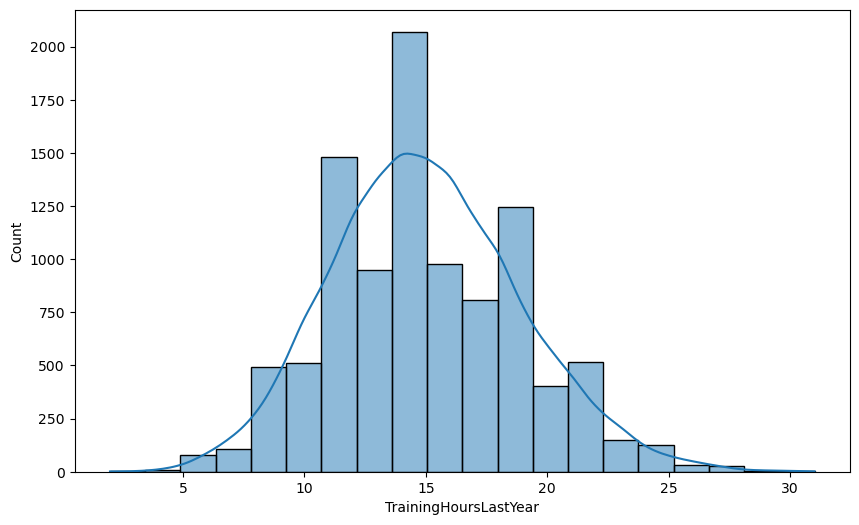

In [9]:
for i in numeric_columns:
    plt.figure(figsize=(10,6))
    sns.histplot(df[i],kde=True,bins=20)
    plt.show()

In [ ]:
sns.countplot(df["EmployeeID"])


In [ ]:
training_counts = df['TrainingHoursLastYear'].value_counts()
plt.figure()
plt.pie(training_counts, labels=training_counts.index, autopct='%1.1f%%')
plt.title("Training Hours Last Year Distribution")
plt.show()


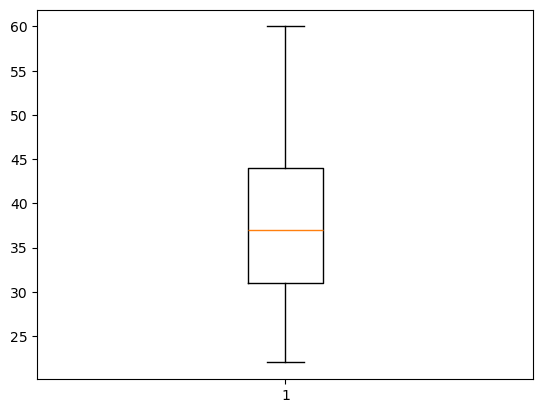

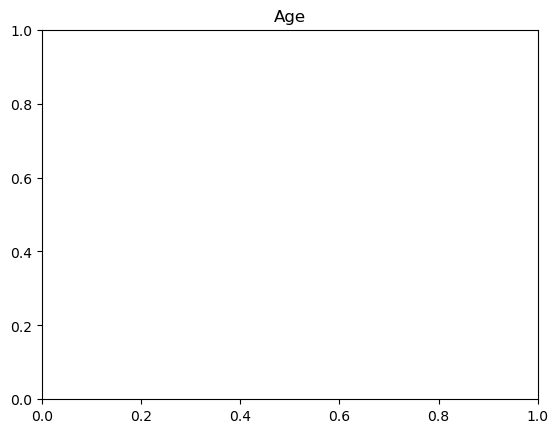

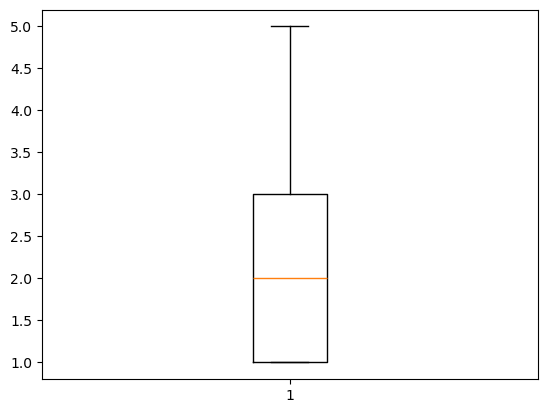

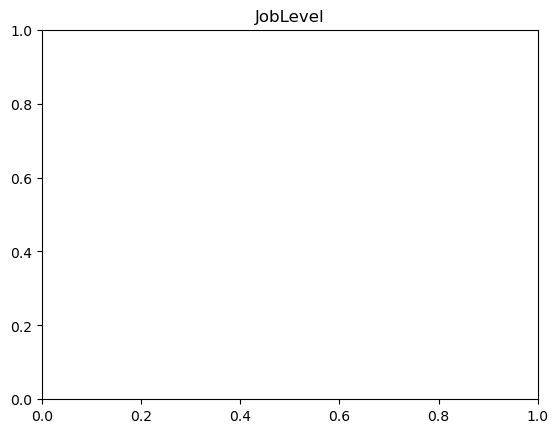

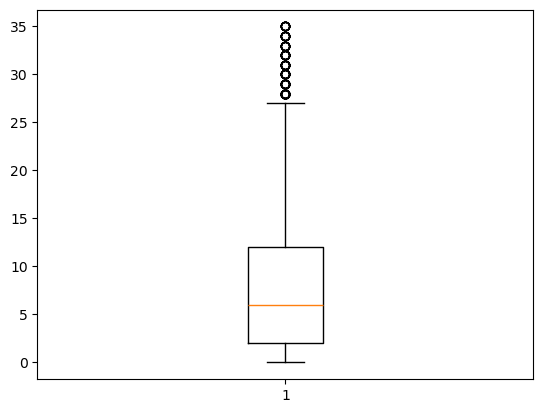

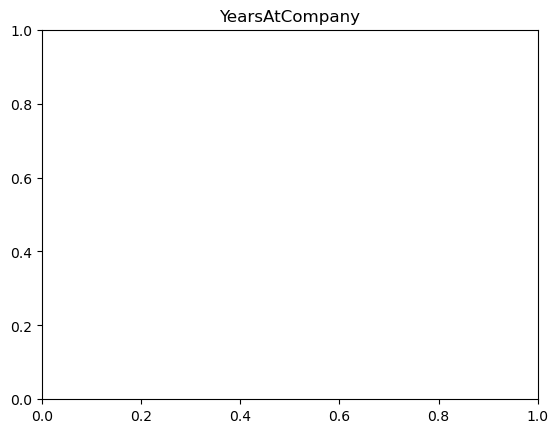

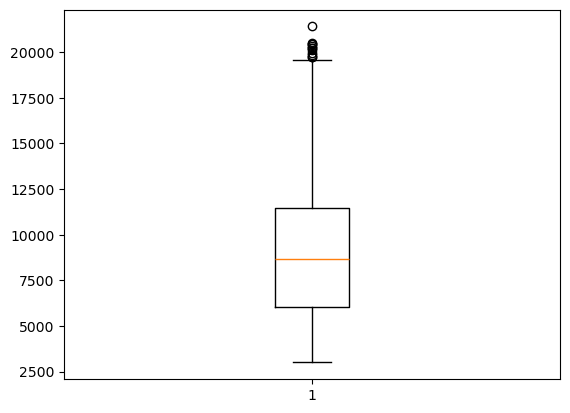

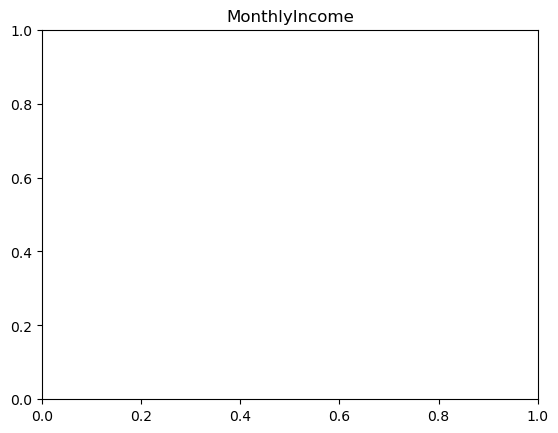

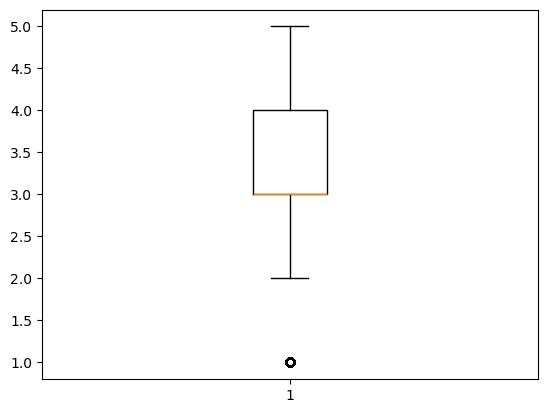

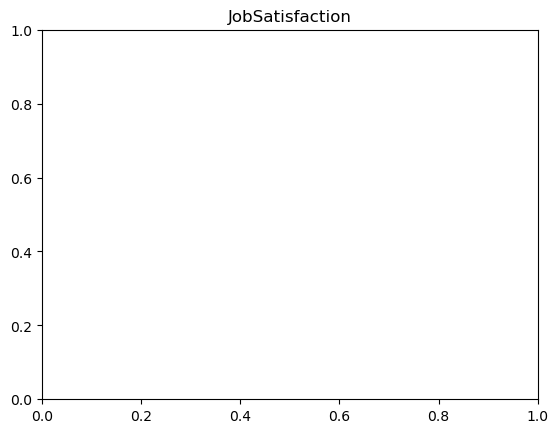

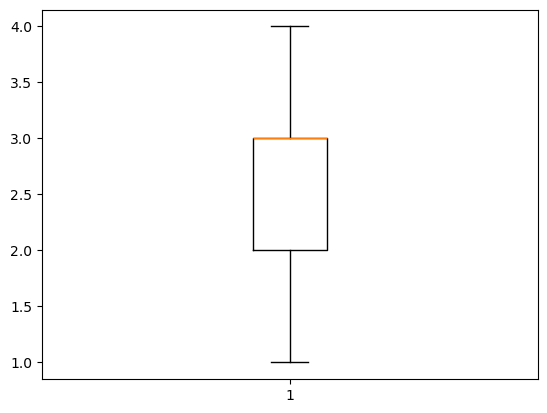

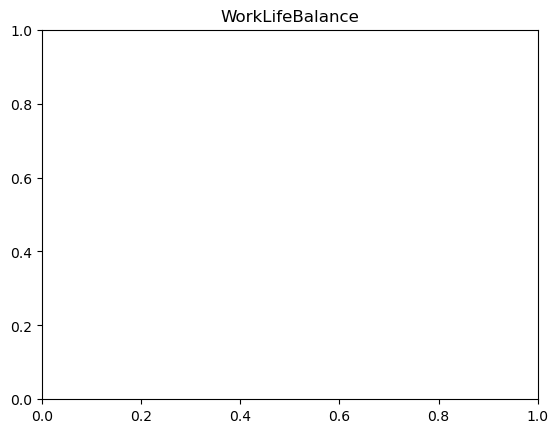

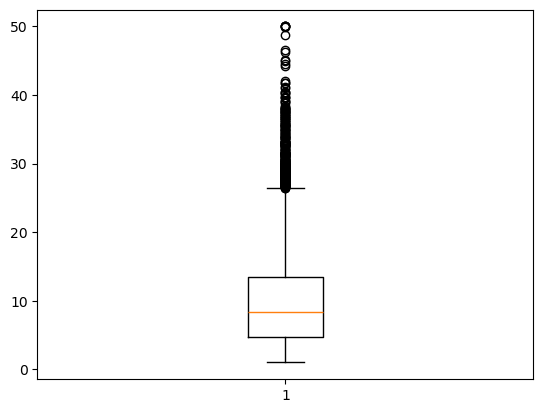

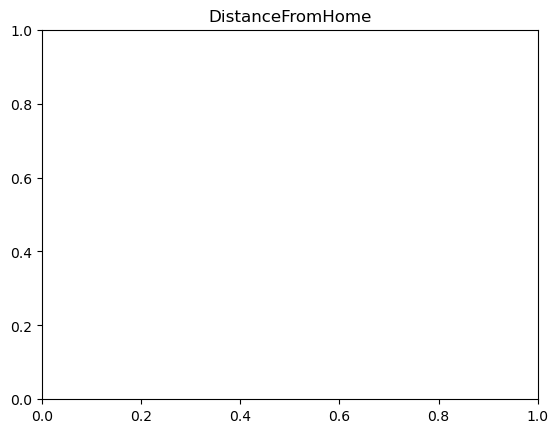

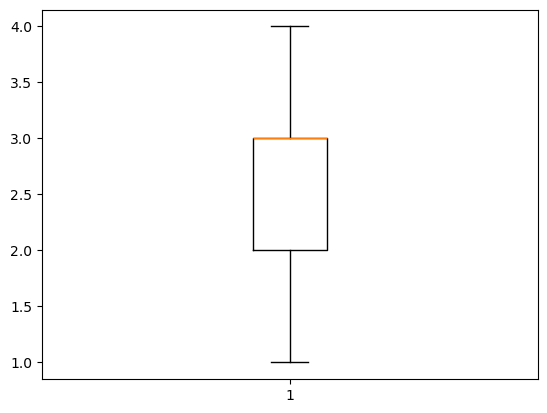

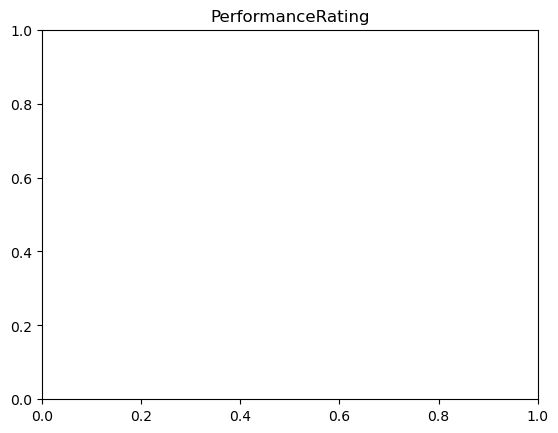

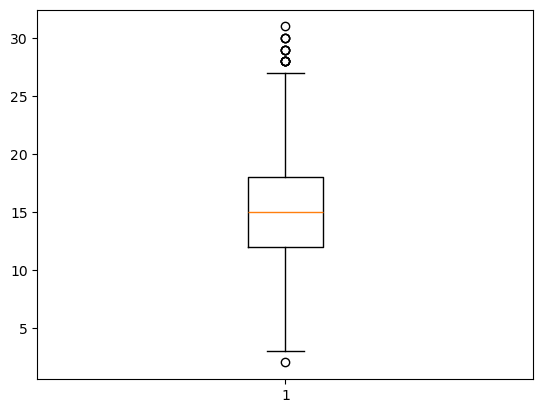

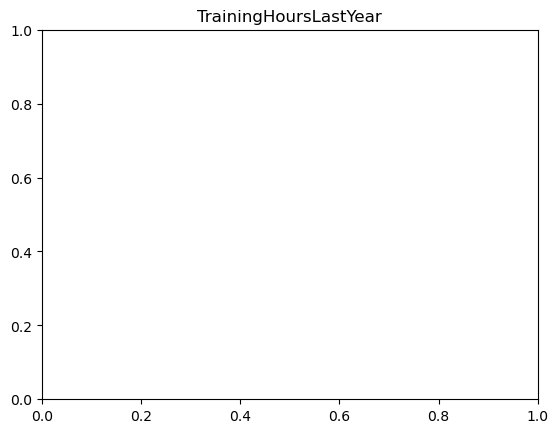

In [10]:
#outliers
for col in numeric_columns:
    plt.boxplot(df[col])
    plt.figure()
    plt.title(col)
    plt.show()

data cleaning and preprocessing

In [11]:
df.head()

,EmployeeID,Age,Department,JobLevel,YearsAtCompany,MonthlyIncome,JobSatisfaction,WorkLifeBalance,OverTime,DistanceFromHome,PromotionLast5Years,PerformanceRating,TrainingHoursLastYear,Attrition
0,EMP0000,42,Sales,3,9,9866,4,1,No,24.5,Yes,4,19,No
1,EMP0001,36,Sales,3,7,8958,3,3,No,10.0,No,2,13,No
2,EMP0002,44,Sales,4,16,11716,4,3,No,4.0,No,4,13,No
3,EMP0003,53,Finance,4,30,17061,5,3,No,7.1,No,3,20,No
4,EMP0004,35,HR,2,4,5738,2,3,No,8.4,No,2,15,No


In [12]:
df.duplicated().sum()   # no duplicates

np.int64(0)

FEATURE ENGINEERING

In [13]:
numeric_columns

,Age,JobLevel,YearsAtCompany,MonthlyIncome,JobSatisfaction,WorkLifeBalance,DistanceFromHome,PerformanceRating,TrainingHoursLastYear
0,42,3,9,9866,4,1,24.5,4,19
1,36,3,7,8958,3,3,10.0,2,13
2,44,4,16,11716,4,3,4.0,4,13
3,53,4,30,17061,5,3,7.1,3,20
4,35,2,4,5738,2,3,8.4,2,15
...,...,...,...,...,...,...,...,...,...
9995,51,4,28,14510,4,1,14.0,3,17
9996,22,1,0,5659,3,3,25.3,3,19
9997,30,1,0,4223,3,4,15.8,2,20
9998,42,2,2,7990,5,3,5.7,3,25


In [30]:
# find outliers & removes outliers

In [32]:
for j in numeric_columns:
    Q1=df[j].quantile(0.25)
    Q3=df[j].quantile(0.75)
    iqr=Q3-Q1
    lower_limit=Q1-(1.5*iqr)
    upper_limit=Q3+(1.5*iqr)
    outliers=df[(df[j]<lower_limit) | (df[j]>upper_limit)]
    print(j,"outliers:",outliers.shape[0])
    
    df[j]=df[(j)].clip(lower_limit,upper_limit)

print("=="*66)
print("=="*66)
print("removes outliers")


Age outliers: 0
JobLevel outliers: 0
YearsAtCompany outliers: 0
MonthlyIncome outliers: 0
JobSatisfaction outliers: 0
WorkLifeBalance outliers: 0
DistanceFromHome outliers: 0
PerformanceRating outliers: 0
TrainingHoursLastYear outliers: 0
removes outliers


In [50]:
for j in numeric_columns:
    Q1=df[j].quantile(0.25)
    Q3=df[j].quantile(0.75)
    iqr=Q3-Q1

    lower_limit=Q1-(1.5*iqr)
    upper_limit=Q3+(1.5*iqr)
    outliers=df[(df[j]<lower_limit) | (df[j]>upper_limit)]
    print(j,"outliers:",outliers.shape[0])

Age outliers: 0
JobLevel outliers: 0
YearsAtCompany outliers: 0
MonthlyIncome outliers: 0
JobSatisfaction outliers: 0
WorkLifeBalance outliers: 0
DistanceFromHome outliers: 0
PerformanceRating outliers: 0
TrainingHoursLastYear outliers: 0


now outliers is removed

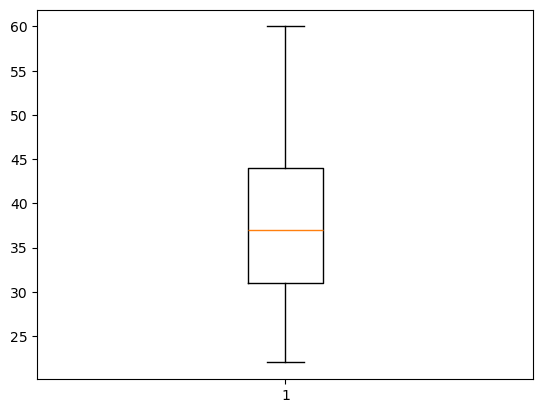

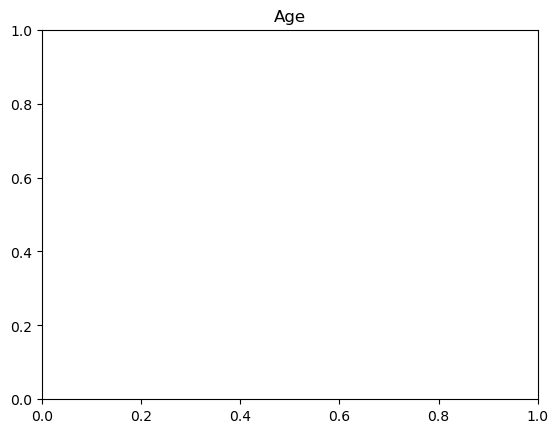

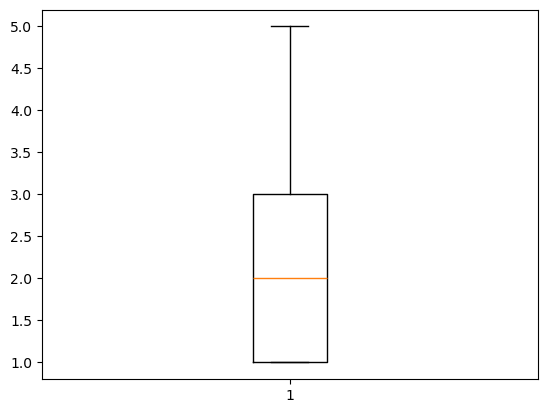

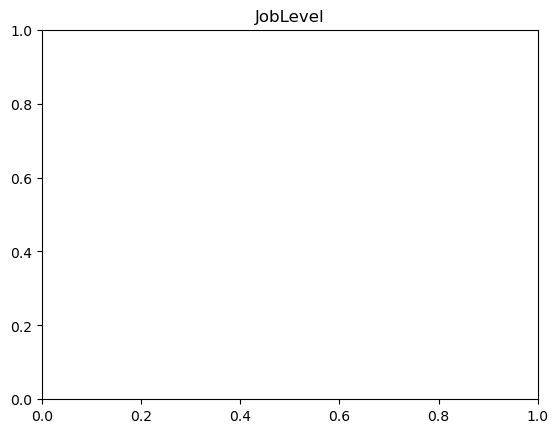

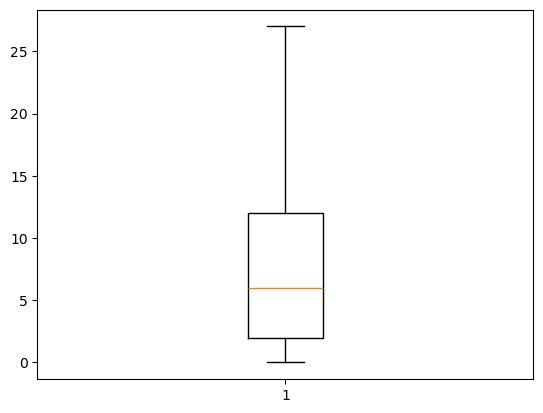

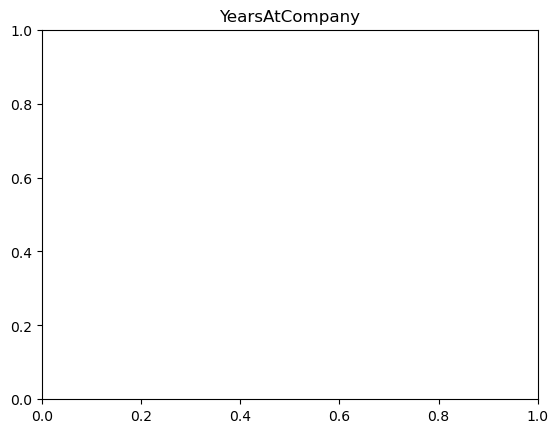

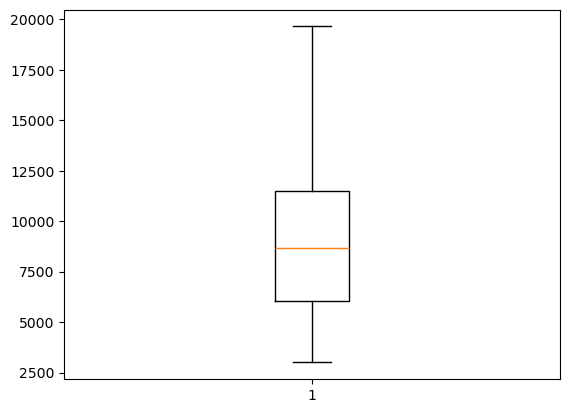

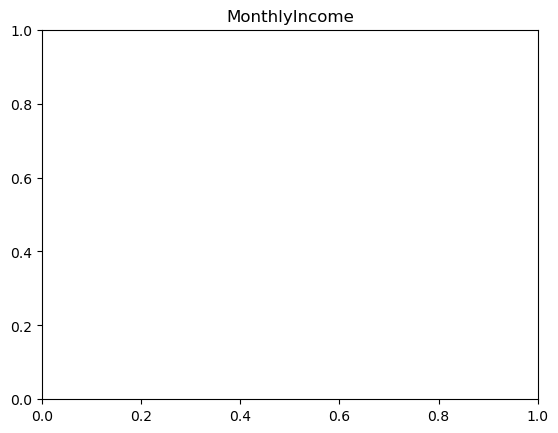

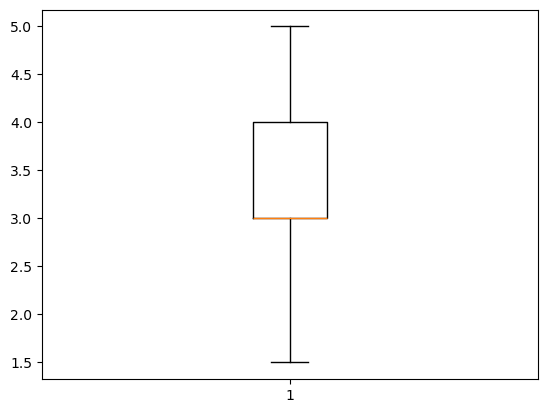

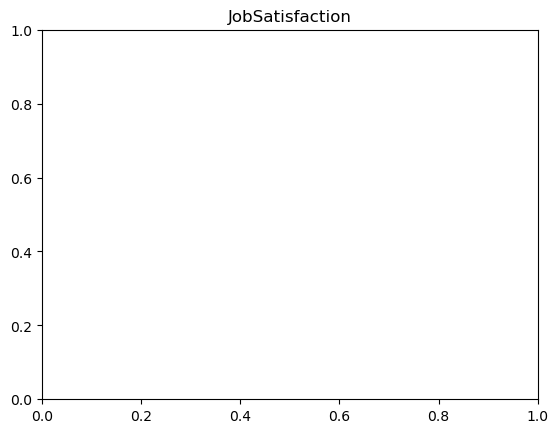

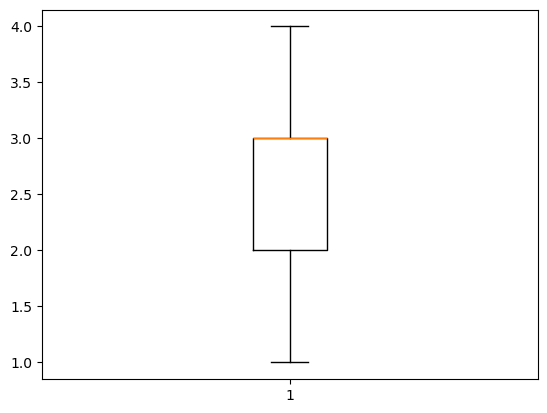

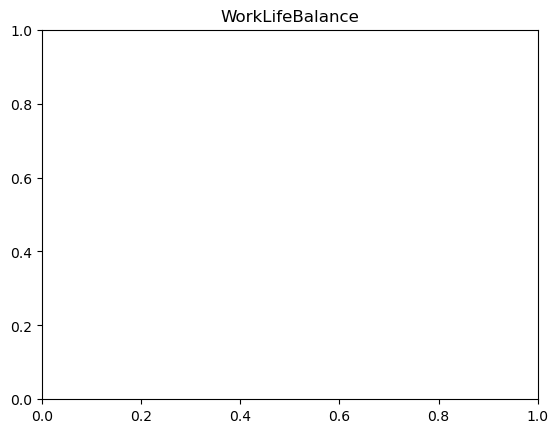

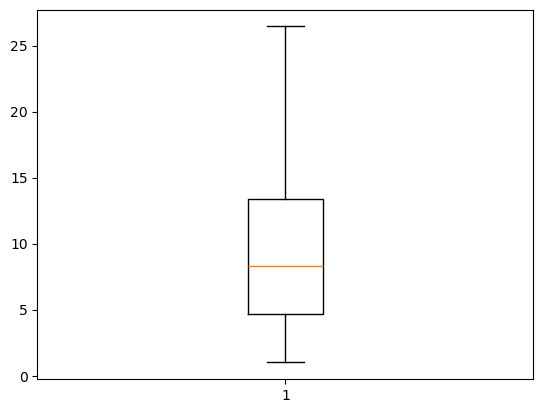

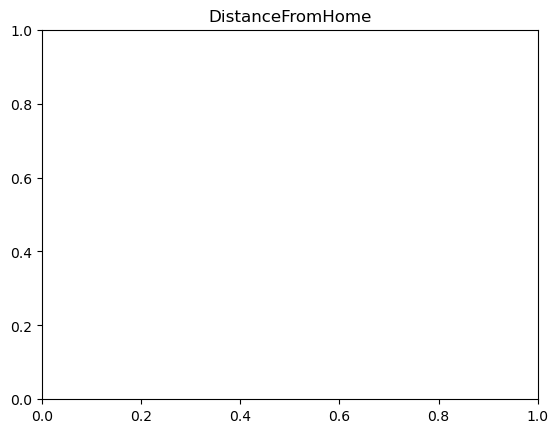

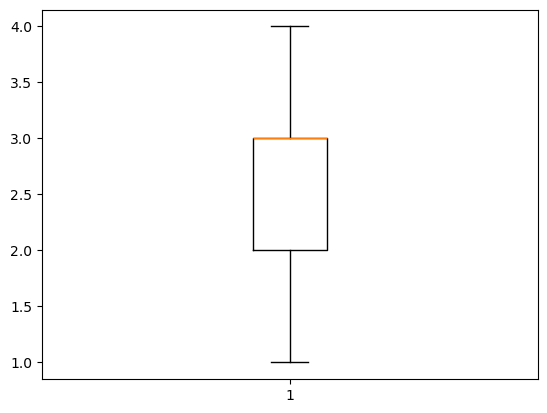

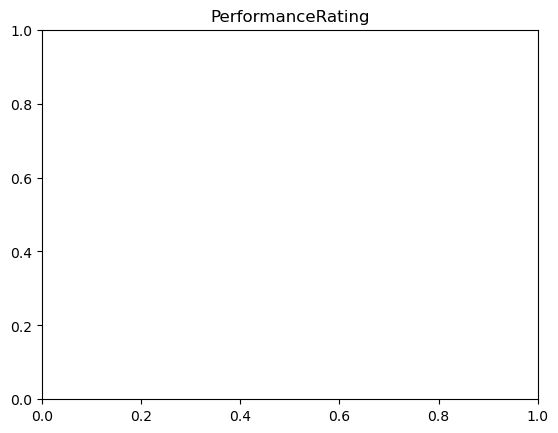

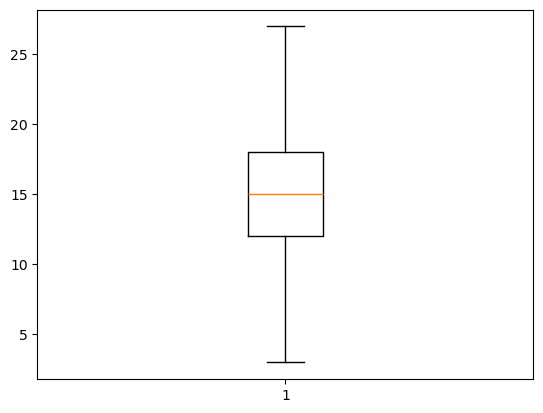

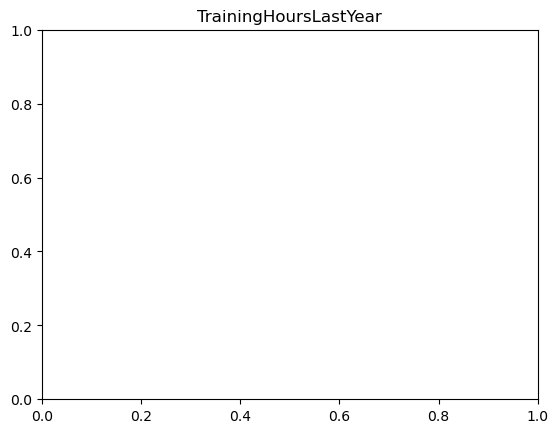

In [34]:
#outliers
for col in numeric_columns:
    plt.boxplot(df[col])
    plt.figure()
    plt.title(col)
    plt.show()

After applying the IQR method it is clear that no outliers are present in the data.

In [35]:
# apply normalization 

In [37]:
from sklearn.preprocessing import MinMaxScaler


In [49]:
scaler = MinMaxScaler()
scaled=scaler.fit_transform(numeric_columns)
df_norm = pd.DataFrame(scaled, columns=numeric_columns.columns)
print("normalized data")
print(df_norm)


print("completed")


normalized data
           Age  JobLevel  YearsAtCompany  MonthlyIncome  JobSatisfaction  \
0     0.526316      0.50        0.257143       0.372949             0.75   
1     0.368421      0.50        0.200000       0.323628             0.50   
2     0.578947      0.75        0.457143       0.473438             0.75   
3     0.815789      0.75        0.857143       0.763770             1.00   
4     0.342105      0.25        0.114286       0.148724             0.25   
...        ...       ...             ...            ...              ...   
9995  0.763158      0.75        0.800000       0.625204             0.75   
9996  0.000000      0.00        0.000000       0.144432             0.50   
9997  0.210526      0.00        0.000000       0.066431             0.50   
9998  0.526316      0.25        0.057143       0.271048             1.00   
9999  0.578947      0.50        0.257143       0.370940             0.00   

      WorkLifeBalance  DistanceFromHome  PerformanceRating  \
0        

okkkk done
